###  Created by Basil Khan

#### Import required libraries


In [26]:
import numpy as np
import pandas as pd
from statistics import mean
from scipy.stats import multivariate_normal
import seaborn as sn
import matplotlib.pyplot as plt

#### Load and pre-process data


In [27]:
data_set = np.array(pd.read_csv("data.csv"))
is_zero = data_set[data_set[:, 2] == 0]
is_one = data_set[data_set[:, 2] == 1]
is_two = data_set[data_set[:, 2] == 2]

#### Compute priors


In [28]:
P_0 = len(is_zero)/len(data_set)
P_1 = len(is_one)/len(data_set)
P_2 = len(is_two)/len(data_set)
print("P_0 =",P_0)
print("P_1 =",P_1)
print("P_2 =",P_2)

P_0 = 0.3
P_1 = 0.3
P_2 = 0.4


#### Compute means


In [29]:
M_0 = [mean(is_zero[:, 0]), mean(is_zero[:, 1])]
M_1 = [mean(is_one[:, 0]), mean(is_one[:, 1])]
M_2 = [mean(is_two[:, 0]), mean(is_two[:, 1])]
print("M_0 =",M_0)
print("M_1 =",M_1)
print("M_2 =",M_2)

M_0 = [-2.1059717039309698, -2.032698245391774]
M_1 = [2.113223539499441, 2.1036243188281136]
M_2 = [2.493718061318996, -2.536911373769994]


#### Compute covariance matrices


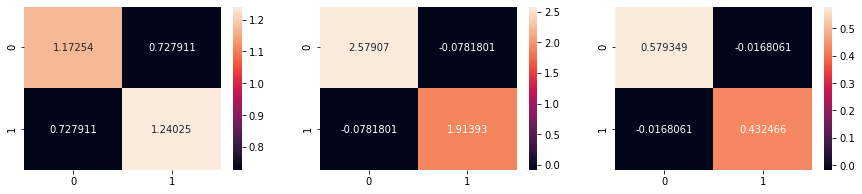

In [30]:
# Compute Covariance Matrices
plt.figure(figsize=(15,3))
C_0 = np.cov([is_zero[:, 0], is_zero[:, 1]], bias=True)
plt.subplot(1, 3, 1)
sn.heatmap(C_0, annot=True, fmt='g')

C_1 = np.cov([is_one[:, 0], is_one[:, 1]], bias=True)
plt.subplot(1, 3, 2)
sn.heatmap(C_1, annot=True, fmt='g')

C_2 = np.cov([is_two[:, 0], is_two[:, 1]], bias=True)
plt.subplot(1, 3, 3)
sn.heatmap(C_2, annot=True, fmt='g')

#### Compute likelihood distribution


In [31]:
p0 = multivariate_normal(mean=M_0, cov=C_0)
p1 = multivariate_normal(mean=M_1, cov=C_1)
p2 = multivariate_normal(mean=M_2, cov=C_2)

#### Compute discriminative function


In [32]:
[x1, x2] = np.meshgrid(np.sort(data_set[:, 0]), np.sort(data_set[:, 1]))
y0 = p0.pdf(np.vstack((x1.flatten(), x2.flatten())).T)*P_0
y1 = p1.pdf(np.vstack((x1.flatten(), x2.flatten())).T)*P_1
y2 = p2.pdf(np.vstack((x1.flatten(), x2.flatten())).T)*P_2

#### Plot contours and boundaries


(-4.5, 4.5)

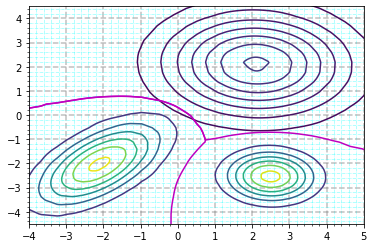

In [33]:
cl0 = plt.contour(x1, x2, y0.reshape(len(data_set), len(data_set)), vmin=0, vmax=np.vstack((y0, y1)).max())
cl1 = plt.contour(x1, x2, y1.reshape(len(data_set), len(data_set)), vmin=0, vmax=np.vstack((y0, y2)).max())
cl2 = plt.contour(x1, x2, y2.reshape(len(data_set), len(data_set)), vmin=0, vmax=np.vstack((y1, y2)).max())

g0 = y0 - np.vstack((y1,y2)).max(axis = 0)
g1 = y1 - np.vstack((y0,y2)).max(axis = 0)
plt.contour(x1, x2, g0.reshape(len(data_set), len(data_set)), levels=[0], colors='m')
plt.contour(x1, x2, g1.reshape(len(data_set), len(data_set)), levels=[0], colors='m')
plt.grid(color='grey', which='major', alpha=0.5, linestyle='--', linewidth=1.5)
plt.minorticks_on()
plt.grid(color='aqua', which='minor', alpha=0.6, linestyle='-.', linewidth=0.5)
plt.xlim(-4, 5)
plt.ylim(-4.5, 4.5)